In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette('husl')
#sns.set(style="white", color_codes=True)
#sns.set(style="darkgrid")

# 1. Introduction des données.

**1.1.** Récupération des données.
 
**1.2.** Aperçu.
 
**1.3.** Jeu d'entraînement, jeu de test et mélange.

# 1.1. Récupération des données.

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [3]:
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

On peut également récupérer les données en passant par seaborn.

In [4]:
# iris = sns.load_dataset('iris')

# 1.2. Aperçu des données disponibles.

In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
iris.shape

(150, 6)

In [7]:
iris.keys()

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
list(iris.keys())

['Id',
 'SepalLengthCm',
 'SepalWidthCm',
 'PetalLengthCm',
 'PetalWidthCm',
 'Species']

In [9]:
iris.columns.values

array(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
       'PetalWidthCm', 'Species'], dtype=object)

In [10]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [12]:
# iris.count

In [13]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [14]:
iris.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [15]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [16]:
iris.describe(include=['O'])

,Species
count,150
unique,3
top,Iris-virginica
freq,50


In [17]:
iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

# 1.3 Jeu d'entrainement, jeu de test et mélange

In [18]:
#iris.drop('Id', axis=1, inplace=True)

In [19]:
from sklearn.model_selection import train_test_split  #to split the dataset for training and testing
iris_train, iris_test = train_test_split(iris, test_size=0.2, random_state=42)

In [20]:
iris_train.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
106,107,4.9,2.5,4.5,1.7,Iris-virginica
14,15,5.8,4.0,1.2,0.2,Iris-setosa
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
102,103,7.1,3.0,5.9,2.1,Iris-virginica


In [21]:
X_train = iris_train.drop(['Species'], axis=1)
y_train = iris_train.loc[:,['Species']] # ou y_train = iris_train.iloc[:,5]
# Ou encore y_train = iris_train[['Species']]
X_test = iris_test.drop(['Species'], axis=1)
y_test = iris_test.loc[:,['Species']] # ou y_test = iris_test.iloc[:,5]
# Ou encore y_test = iris_test[['Species']]

# Différemment
#y_train = iris_train['Species']
#y_test = iris_test['Species']

In [22]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 5)
(120, 1)
(30, 5)
(30, 1)


In [23]:
y_train.value_counts()

Species        
Iris-versicolor    41
Iris-setosa        40
Iris-virginica     39
dtype: int64

# 2. Data visualizations

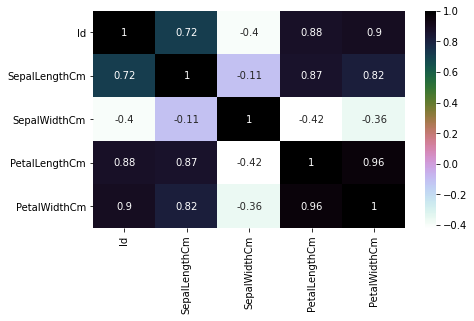

In [24]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

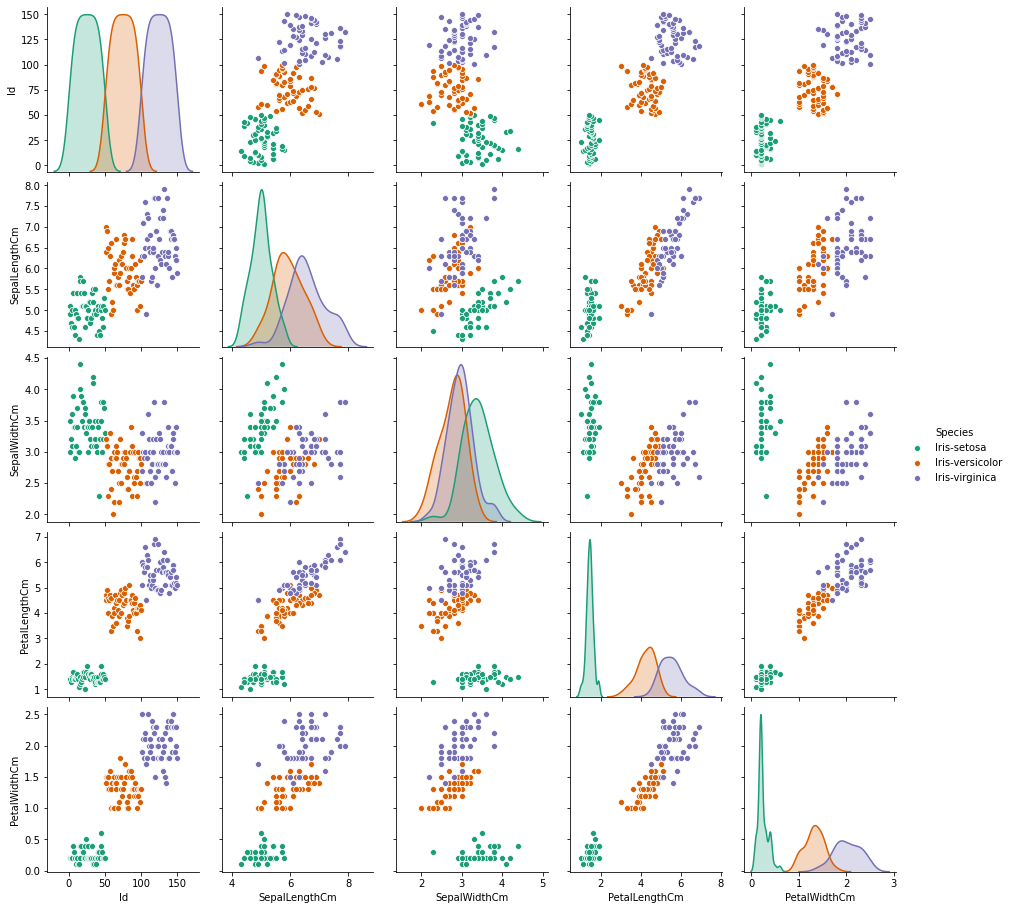

In [25]:
sns.pairplot(iris,hue='Species',palette='Dark2')

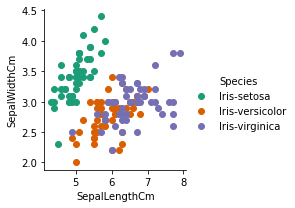

In [26]:
sns.FacetGrid(iris, palette='Dark2', hue="Species") \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm") \
   .add_legend()

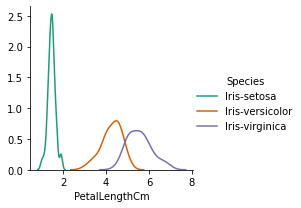

In [27]:
sns.FacetGrid(iris, hue="Species", palette='Dark2') \
   .map(sns.kdeplot, "PetalLengthCm") \
   .add_legend()

# 2.1 Boxplot 

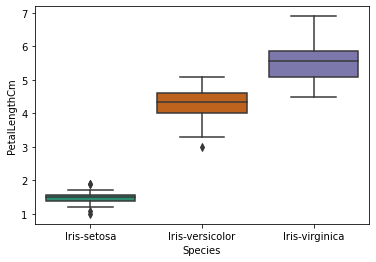

In [28]:
sns.boxplot(x="Species", y="PetalLengthCm", data=iris, palette='Dark2')

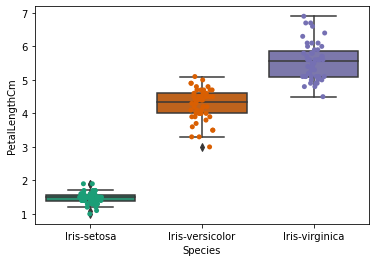

In [29]:
ax = sns.boxplot(x="Species", y="PetalLengthCm", data=iris, palette='Dark2')
ax = sns.stripplot(x="Species", y="PetalLengthCm", data=iris, palette='Dark2', jitter=True, edgecolor="gray")

# 2.2 Violinplot

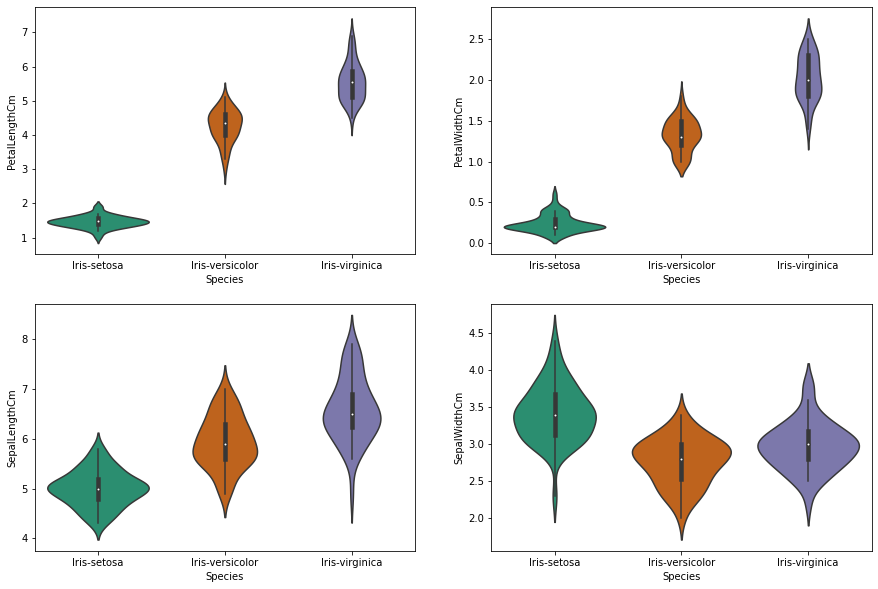

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris, palette='Dark2')
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris, palette='Dark2')
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris, palette='Dark2')
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris, palette='Dark2')

# 3. Classification binaire

Essayons de construire un classificateur pour détecter les iris de type *virginica*.

# 3.1 Régression logistique

**3.1.1. A une variable : 'PetalWidthCm'**

Basons nous uniquement sur la largeur du pétale. 

In [31]:
X = X_train.loc[:,['PetalWidthCm']] # ou X = X_train.iloc[:,[4]] PANDAS
# Ou encore X = X_train[['PetalWidthCm']]
X

,PetalWidthCm
22,0.2
15,0.4
65,1.4
11,0.2
42,0.2
...,...
71,1.3
106,1.7
14,0.2
92,1.2


**Remarque.** Comparer le résultat obtenu avec le suivant.

In [32]:
x = X_train.loc[:,'PetalWidthCm'] # ou x = X_train.iloc[:,4] 
# Ou encore x = X_train['PetalWidthCm']
x

22     0.2
15     0.4
65     1.4
11     0.2
42     0.2
      ... 
71     1.3
106    1.7
14     0.2
92     1.2
102    2.1
Name: PetalWidthCm, Length: 120, dtype: float64

In [33]:
y = (y_train == 'Iris-virginica').astype(np.int)
y

,Species
22,0
15,0
65,0
11,0
42,0
...,...
71,0
106,1
14,0
92,0


Maintenant, entraînons un modèle de régression logistique :

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

Examinons les probabilités estimées par le modèle pour les fleurs ayant des tailles de pétales comprises entre 0 et 3 cm : 

In [35]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1) # Reshape à 1 colonne, on ne spécifie rien pour le nombre de lignes (-1), il est déterminé par le nombre de colonnes 
y_proba = log_reg.predict_proba(X_new)
y_proba

array([[0.99847916, 0.00152084],
       [0.9984612 , 0.0015388 ],
       [0.99844304, 0.00155696],
       ...,
       [0.0053109 , 0.9946891 ],
       [0.00524916, 0.99475084],
       [0.00518814, 0.99481186]])

Colonne 0 : Probabilité non-*virginica*

Colonne 1 : Probabilité *virginica*

(0.0, 3.0, 0.0, 1.0)

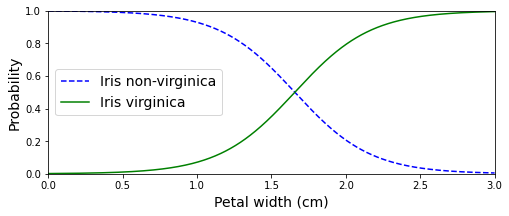

In [36]:
plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:,0], "b--", label="Iris non-virginica")
plt.plot(X_new, y_proba[:,1], "g-", label="Iris virginica")
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, 0, 1])

La largeur des pétales des fleurs d'iris virginica s'étage de 1,4 cm à 2,5 cm, tandis que les autres fleurs d'iris ont en général une largeur de pétales inférieure, allant de 0,1 cm à 1,8 cm. Remarquez qu'il y a un léger recouvrement. Au-dessus de 2 cm, le classiticateur estime avec une grande confiance que la fleur est un iris virginica (il indique une haute probabilité pour cette classe), tandis qu'en dessous de 1 cm, il estime avec une grande confiance que la fleur n'est pas un iris virginica (haute probabilité pour la classe « Iris non-virginica »). Entre ces deux extrêmes, le classificateur n'a pas de certitude. Cependant, si vous lui demandez de prédire la classe (en utilisant la méthode predict () plutôt que la méthode predict proba ()), il renverra la classe la plus probable, et par conséquent il y a une frontiere de décision aux alentours de 1,6 cm où les deux probabilités sont égales à 50 % : si la largeur de pétale est supérieure à 1,6 cm, le classificateur prédira que la fleur est un iris virginica, sinon il prédira que ce n'en est pas un (même s'il n'est pas vraiment sûr de cela): 



In [37]:
decision_boundary_right = X_new[y_proba[:, 1] >= 0.5]
decision_boundary = decision_boundary_right[0]
decision_boundary

array([1.65765766])

In [38]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

**3.1.2. A deux variables : 'PetalWidthCm', 'PetalLengthCm'**

In [39]:
X1 = X_train[['PetalWidthCm','PetalLengthCm']] 
# On peut également utiliser Pandas des façons suivantes
#X1 = X_train.iloc[:,[4,3]]
#X1 = X_train.loc[:,['PetalWidthCm','PetalLengthCm']]
X1

,PetalWidthCm,PetalLengthCm
22,0.2,1.0
15,0.4,1.5
65,1.4,4.4
11,0.2,1.6
42,0.2,1.3
...,...,...
71,1.3,4.0
106,1.7,4.5
14,0.2,1.2
92,1.2,4.0


In [40]:
log_reg = LogisticRegression(solver="liblinear", C=10**10, random_state=42)
log_reg.fit(X1, y)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=10000000000, random_state=42, solver='liblinear')

In [41]:
#x0, x1 = np.meshgrid(
#        np.linspace(2.9, 7, 500).reshape(-1, 1),
#        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
#    )
#X_new = np.c_[x0.ravel(), x1.ravel()]

#y_proba1 = log_reg.predict_proba(X_new)

#plt.figure(figsize=(10, 4))
#plt.plot(X1[y==0, 0], X1[y==0, 1], "bs")
#plt.plot(X1[y==1, 0], X1[y==1, 1], "g^")

La figure est une autre représentation graphique du même jeu de données, obtenue cette fois-ci en croisant deux variables: la largeur des pétales et leur longueur. Une fois entraîné, le classificateur de régression logistique peut estimer la probabilité qu'une nouvelle fleur soit un iris virginica en se basant sur ces deux variables. La ligne en pointillé représente les points où le modèle estime une probabilité de 50 %: c'est la frontière de décision du modèle. Notez que cette frontière est linéaire. Chaque ligne parallèle matérialise les points où le modèle estime une probabilité donnée, de 15 % (en bas à gauche), jusqu'à 90 % (en haut à droite). D'après le modèle, toutes les fleurs au-dessus de la ligne en haut à droite ont plus de 90 % de chances d'être des iris virginica.

**3.1.2.1 Régression softmax**

Calculons le vecteur gradient de chaque classe, puis utilisons une descente de gradient (ou un autre algorithme d'optimisation) pour trouver la matrice des paramètres theta qui minimise la fonction de coût.

Utilisons la régression softmax pour répartir les fleurs d'iris en trois classes. 

In [42]:
X_sm = X_train[['PetalWidthCm','PetalLengthCm']]
y_sm = y_train
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X_sm, y_sm)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(C=10, multi_class='multinomial')

Par conséquent, la prochaine fois que vous trouverez un iris ayant des pétales de 5 cm de long et de 2 cm de large et que vous demanderez à votre modèle de vous dire de quel type d'iris il s'agit, il vous répondra Iris *virginica* (classe 2) avec une probabilité de 94,2 % (ou Iris *versicolor* avec une probabilité de 5,8 %).

In [43]:
softmax_reg.predict([[5, 2]])

array(['Iris-virginica'], dtype=object)

In [44]:
softmax_reg.predict_proba([[5, 2]])

array([[1.38474211e-03, 2.29787038e-04, 9.98385471e-01]])

# 3.2 SVM linéaire

# 3.2.1 Classification à large marge

In [45]:
from sklearn.svm import SVC

X_svm = X_train[['PetalLengthCm','PetalWidthCm']]
y_svm = y_train

X_svm = X_svm[ (y_svm['Species']=='Iris-setosa') | (y_svm['Species']=='Iris-versicolor') ]
y_svm = y_svm[ (y_svm['Species']=='Iris-setosa') | (y_svm['Species']=='Iris-versicolor') ]

In [46]:
svm_clf = SVC(kernel="linear", C=float("inf")) # float("inf") = +\infty
svm_clf.fit(X_svm, y_svm)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(C=inf, kernel='linear')

(0.0, 5.5, 0.0, 2.0)

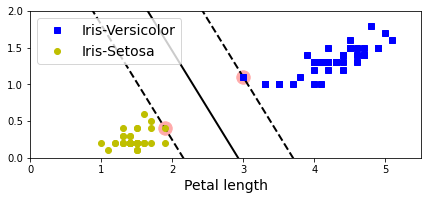

In [47]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

plt.figure(figsize=(7,2.7))
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X_svm[['PetalLengthCm']][y_svm['Species']=='Iris-versicolor'], X_svm[['PetalWidthCm']][y_svm['Species']=='Iris-versicolor'], "bs", label="Iris-Versicolor")
plt.plot(X_svm[['PetalLengthCm']][y_svm['Species']=='Iris-setosa'], X_svm[['PetalWidthCm']][y_svm['Species']=='Iris-setosa'], "yo", label="Iris-Setosa")
plt.xlabel("Petal length", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# 3.2.2. Classification à marge souple

**3.2.2.1 Comparaison de deux modèles**

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

scaler = StandardScaler()

X_svm_ms = X_train[['PetalLengthCm','PetalWidthCm']]
y_svm_ms = (y_train['Species'] == 'Iris-virginica').astype(np.float64)

svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf1.fit(X_svm_ms, y_svm_ms)
scaled_svm_clf2.fit(X_svm_ms, y_svm_ms)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [49]:
#X_svm_ms = X_svm_ms.to_numpy()

LinearSVC, contrairement à SVC, n'a pas de coef_, intercept_ et support_vectors_. Le code suivant permet de remonter à ces éléments.

In [50]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y_svm_ms * 2 - 1
support_vectors_idx1 = (t * (X_svm_ms.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X_svm_ms.dot(w2) + b2) < 1).ravel()
svm_clf1.support_vectors_ = X_svm_ms.to_numpy()[support_vectors_idx1]
svm_clf2.support_vectors_ = X_svm_ms.to_numpy()[support_vectors_idx2]

On peut donc maintenant utiliser la fonction plot_svc_decision_boundary.

(4.0, 6.0, 0.8, 2.8)

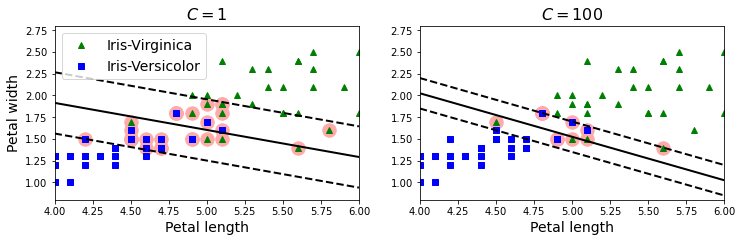

In [51]:
plt.figure(figsize=(12,3.2))

plt.subplot(121)
plt.plot(X_svm_ms[['PetalLengthCm']][y_svm_ms==1], X_svm_ms[['PetalWidthCm']][y_svm_ms==1], "g^", label="Iris-Virginica")
plt.plot(X_svm_ms[['PetalLengthCm']][y_svm_ms==0], X_svm_ms[['PetalWidthCm']][y_svm_ms==0], "bs", label="Iris-Versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])

plt.subplot(122)
plt.plot(X_svm_ms[['PetalLengthCm']][y_svm_ms==1], X_svm_ms[['PetalWidthCm']][y_svm_ms==1], "g^")
plt.plot(X_svm_ms[['PetalLengthCm']][y_svm_ms==0], X_svm_ms[['PetalWidthCm']][y_svm_ms==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 6, 0.8, 2.8])
#(y_svm_ms=='Iris-setosa') |

**3.2.2.2 Sélection du meilleur modèle et prédiction**

Le code Scikit-Learn qui suit normalise les variables, puis entraîne un modèle SVM linéaire, en utilisant la classe LinearSVC avec C=0,1 et la fonction de *coût charnière* (en anglais, *hinge loss*), afin de détecter les fleurs de la variété *Iris virginica*.

In [52]:
X_ms = X_train[['PetalLengthCm','PetalWidthCm']]
y_ms = (y_train == 'Iris-virginica').astype(np.float64)

svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ))
svm_clf.fit(X_ms, y_ms)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

Puis vous pouvez, comme d'habitude, utiliser le modèle pour effectuer des prédictions :

In [53]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

# 3.3 Comparaison Linear SVC, SVC et SGDClassifier

Entraînons un LinearSVC sur un jeu de données linéairement séparable. Puis entraînons un SVC et un SGDClassifier sur le même jeu de données. Voyons si nous pouvons leur faire produire à peu près le même modèle.

In [54]:
X_c = X_train[['PetalLengthCm','PetalWidthCm']]
y_c = y_train

X_c = X_c[ (y_c['Species']=='Iris-setosa') | (y_c['Species']=='Iris-versicolor') ]
y_c = y_c[ (y_c['Species']=='Iris-setosa') | (y_c['Species']=='Iris-versicolor') ]

In [55]:
y_c

,Species
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa
...,...
74,Iris-versicolor
20,Iris-setosa
71,Iris-versicolor
14,Iris-setosa


In [56]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

C = 5
alpha = 1 / (C * len(X_c))

lin_clf = LinearSVC(loss="hinge", C=C, random_state=42)
svm_clf = SVC(kernel="linear", C=C)
sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
                        max_iter=100000, tol=-np.infty, random_state=42)

scaler = StandardScaler()
X_c_scaled = scaler.fit_transform(X_c)

lin_clf.fit(X_c_scaled, y_c)
svm_clf.fit(X_c_scaled, y_c)
sgd_clf.fit(X_c_scaled, y_c)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVC:                    [0.29387591] [[1.05456298 1.09929167]]
SVC:                          [0.32868107] [[1.12273619 1.02460289]]
SGDClassifier(alpha=0.00247): [0.329] [[1.12332074 1.02519961]]


In [57]:
y_c

,Species
22,Iris-setosa
15,Iris-setosa
65,Iris-versicolor
11,Iris-setosa
42,Iris-setosa
...,...
74,Iris-versicolor
20,Iris-setosa
71,Iris-versicolor
14,Iris-setosa


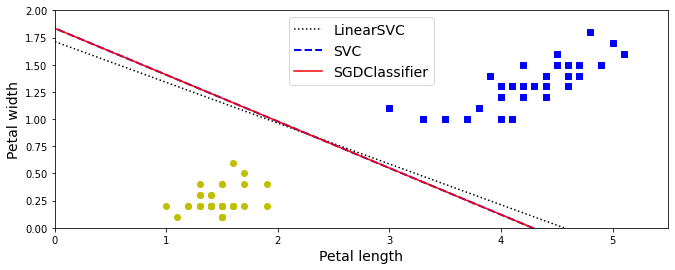

In [58]:
# Calcul la pente (en anglais, slope) wi et l'ordonnée à l'origine (en anglais, bais) bi 
# de chaque frontière de décision, i \in {1,2,3}
# Rappel : w0x0 + w1x1 + b = 0 donc x1 = - (w0/w1)x0 - b/w1
# wi = - w0/w1 et bi = -b/w1
# x1 = wix0 + bi
w1 = -lin_clf.coef_[0, 0]/lin_clf.coef_[0, 1]
b1 = -lin_clf.intercept_[0]/lin_clf.coef_[0, 1]
w2 = -svm_clf.coef_[0, 0]/svm_clf.coef_[0, 1]
b2 = -svm_clf.intercept_[0]/svm_clf.coef_[0, 1]
w3 = -sgd_clf.coef_[0, 0]/sgd_clf.coef_[0, 1]
b3 = -sgd_clf.intercept_[0]/sgd_clf.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X_c[['PetalLengthCm']][y_c['Species']=='Iris-versicolor'], X_c[['PetalWidthCm']][y_c['Species']=='Iris-versicolor'], "bs")#ris-Versicolor"
plt.plot(X_c[['PetalLengthCm']][y_c['Species']=='Iris-setosa'], X_c[['PetalWidthCm']][y_c['Species']=='Iris-setosa'], "yo") # label="Iris-Setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

# 4. Classification muli-classes

# 4.1 SGDClassifier

In [59]:
from sklearn.linear_model import SGDClassifier # class sklearn.linear_model.SGDClassifier
sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42) # Par défaut max_iter = 1000, tol=1e-3 
sgd_clf.fit(X_train, y_train) 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDClassifier(max_iter=5, random_state=42, tol=-inf)

In [60]:
sgd_clf.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [61]:
from sklearn.model_selection import cross_val_score # Fonction cross_val_score()
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([0.375, 0.425, 0.5  ])

Aucune modification du score après normalisation des données.

In [62]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
#cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

In [63]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [64]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[11, 29,  0],
       [ 0, 41,  0],
       [ 0, 39,  0]])

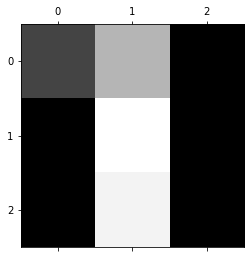

In [65]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [66]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

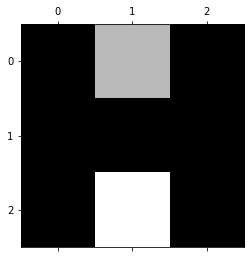

In [67]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

In [68]:
some_flour = X_train.iloc[71]
sgd_clf.predict([some_flour])

array(['Iris-setosa'], dtype='<U15')

In [69]:
some_flour_scores = sgd_clf.decision_function([some_flour])
some_flour_scores

array([[  7649.8551304 ,  -2801.54313754, -13434.16387794]])

In [70]:
np.argmax(some_flour_scores)

0

In [71]:
sgd_clf.classes_[0]

'Iris-setosa'

# 4.2 Arbres de décision

In [72]:
from sklearn.tree import DecisionTreeClassifier

X_tree = iris[['PetalLengthCm','PetalWidthCm']]
y_tree = iris['Species']

In [73]:
X_tree

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [74]:
y_tree

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [75]:
y_tree_float = np.arange(len(y_tree))
i = 0
for x in y_tree:
    if x == 'Iris-setosa' :
        y_tree_float[i] = 0
    if x == 'Iris-versicolor' :
        y_tree_float[i] = 1
    if x == 'Iris-virginica':
        y_tree_float[i] = 2
    i = i+1

y_tree_float

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [76]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_tree, y_tree_float)

DecisionTreeClassifier(max_depth=2, random_state=42)

Text(4.05, 0.5, '(Depth=2)')

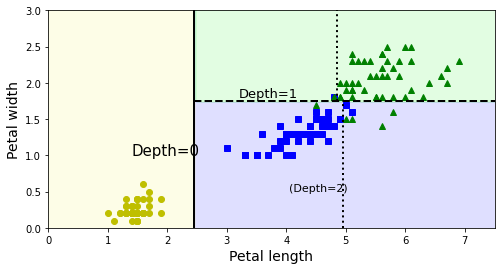

In [77]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[['PetalLengthCm']][y==0], X[['PetalWidthCm']][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[['PetalLengthCm']][y==1], X[['PetalWidthCm']][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[['PetalLengthCm']][y==2], X[['PetalWidthCm']][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X_tree, y_tree_float)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

La figure précédente représente les frontières de décision de cet arbre. La ligne verticale en trait plein représente la frontière de décision du noeud racine (profondeur 0) longueur de pétale = 2,45 cm. La zone de gauche étant pure (elle ne comporte que des Iris setosa), elle ne peut plus être partagée. Par contre, la zone de droite est impure et le noeud de droite de profondeur 1 établit la séparation à largeur de pétale = 1,75 cm (matérialisée par la ligne à tirets). Etant donné que max_depth (profondeur maxi-male) valait 2, l'arbre de décision s'arrête là. Mais si vous aviez donné à max _depth la valeur 3, les deux noeuds de profondeur 2 auraient eu chacun une autre frontière de décision (représentées par les lignes pointillées).

In [78]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [79]:
tree_clf.predict([[5, 1.5]])

array([1])

**4.2.1 Sensibilité aux petites variations des données**

Le principal problème rencontré avec les arbres de décision est qu'ils sont très sensibles à de petites variations des données d'entraînement. Ainsi, en supprimant l'lris versicolor le plus large du jeu d'entraînement (celui ayant des pétales de 4,8 cm de long et 1,8 cm de large) et en entraînant un nouvelle arbre de décision, vous pourriez obtenir le modele représenté sur la figure suivante. Comme vous pouvez le voir, il est très different de l'arbre de décision précédent précédemment. À vrai dire, étant donné que l'algorithme d'entraînement utilisé par Scikit-Learn est stochastique, vous pouvez obtenir des modeles très différents, même avec les mêmes données d'entrainement (à moins de définir l'hyperparamètre random state).

In [80]:
versicolor = X_tree[y_tree_float == 1]
versicolor

,PetalLengthCm,PetalWidthCm
50,4.7,1.4
51,4.5,1.5
52,4.9,1.5
53,4.0,1.3
54,4.6,1.5
55,4.5,1.3
56,4.7,1.6
57,3.3,1.0
58,4.6,1.3
59,3.9,1.4


In [81]:
versicolor_max_width = versicolor[versicolor['PetalWidthCm']==versicolor['PetalWidthCm'].max()]
versicolor_max_width

,PetalLengthCm,PetalWidthCm
70,4.8,1.8


In [82]:
X_tweaked = X_tree
X_tweaked.drop(X_tree.index[70],inplace=True)
X_tweaked.iloc[[68,69,70,71,72]]

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,PetalLengthCm,PetalWidthCm
68,4.5,1.5
69,3.9,1.1
71,4.0,1.3
72,4.9,1.5
73,4.7,1.2


In [83]:
y_tweaked = pd.DataFrame(y_tree_float)
y_tweaked
y_tweaked.drop(y_tweaked.index[70],inplace=True)
y_tweaked.iloc[[68,69,70,71,72]]

,0
68,1
69,1
71,1
72,1
73,1


In [84]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_tweaked, y_tweaked)

DecisionTreeClassifier(max_depth=2, random_state=40)

In [85]:
y_tweaked[0]

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: 0, Length: 149, dtype: int64

Text(1.0, 1.8, 'Depth=1')

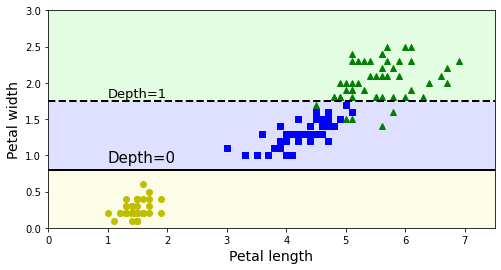

In [86]:
plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf_tweaked, X_tweaked, y_tweaked, legend=False)
plt.plot(X_tweaked[['PetalLengthCm']][y_tweaked[0]==0], X_tweaked[['PetalWidthCm']][y_tweaked[0]==0], "yo", label="Iris-Setosa")
plt.plot(X_tweaked[['PetalLengthCm']][y_tweaked[0]==1], X_tweaked[['PetalWidthCm']][y_tweaked[0]==1], "bs", label="Iris-Versicolor")
plt.plot(X_tweaked[['PetalLengthCm']][y_tweaked[0]==2], X_tweaked[['PetalWidthCm']][y_tweaked[0]==2], "g^", label="Iris-Virginica")
plt.plot([0, 7.5], [0.8, 0.8], "k-", linewidth=2)
plt.plot([0, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.text(1.0, 0.9, "Depth=0", fontsize=15)
plt.text(1.0, 1.80, "Depth=1", fontsize=13)

**4.2.2 Sensibilité à la rotation**

In [87]:
X_ro = iris[['PetalLengthCm','PetalWidthCm']]
y_ro= iris['Species']

angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X_ro.dot(rotation_matrix)

In [88]:
y_tree_float2 = np.arange(len(y_ro))
i = 0
for x in y_ro:
    if x == 'Iris-setosa' :
        y_tree_float2[i] = 0
    if x == 'Iris-versicolor' :
        y_tree_float2[i] = 1
    if x == 'Iris-virginica':
        y_tree_float2[i] = 2
    i = i+1

y_tree_float2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [89]:
tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y_tree_float2)

DecisionTreeClassifier(random_state=42)

In [90]:
Xr

,0,1
0,1.383974,-0.290890
1,1.383974,-0.290890
2,1.290004,-0.256688
3,1.477943,-0.325092
4,1.383974,-0.290890
...,...,...
145,5.673048,0.382788
146,5.348301,0.075315
147,5.570442,0.100880
148,5.860986,0.314384


In [91]:
Xr[0]

0      1.383974
1      1.383974
2      1.290004
3      1.477943
4      1.383974
         ...   
145    5.673048
146    5.348301
147    5.570442
148    5.860986
149    5.408069
Name: 0, Length: 150, dtype: float64

In [92]:
y_tree_float2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

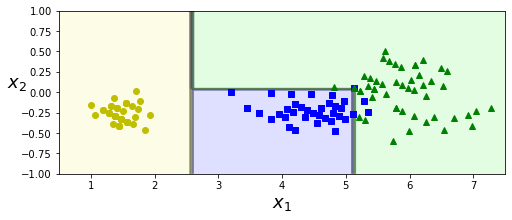

In [93]:
plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y_tree_float2, axes=[0.5, 7.5, -1.0, 1], iris=False, plot_training=False)
plt.plot(Xr[0][y_tree_float2==0], Xr[1][y_tree_float2==0], "yo", label="Iris-Setosa")
plt.plot(Xr[0][y_tree_float2==1], Xr[1][y_tree_float2==1], "bs", label="Iris-Versicolor")
plt.plot(Xr[0][y_tree_float2==2], Xr[1][y_tree_float2==2], "g^", label="Iris-Virginica")

# 4.3. RandomForestClassifier

In [94]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42) # On impose n_estimators=10 pour éviter un warning lié à sa valeur par défaut égale à 100 dans Scikit-Learn 0.22.
forest_clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(n_estimators=10, random_state=42)

In [95]:
forest_clf.predict([some_flour])

array(['Iris-setosa'], dtype=object)

In [96]:
forest_clf.predict_proba([some_flour])

array([[1., 0., 0.]])

In [97]:
# Importing alll the necessary packages to use the various classification algorithms

from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import metrics #for checking the model accuracy

In [98]:
logr = LogisticRegression()
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)
acc_log = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Logistic Regression is', acc_log)

The accuracy of the Logistic Regression is 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [99]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
acc_dt = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the Decision Tree is', acc_dt)

The accuracy of the Decision Tree is 1.0


In [100]:
sv = svm.SVC() #select the algorithm
sv.fit(X_train,y_train) # we train the algorithm with the training data and the training output
y_pred = sv.predict(X_test) #now we pass the testing data to the trained algorithm
acc_svm = metrics.accuracy_score(y_pred,y_test)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 1.0


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [102]:
#submission = pd.DataFrame({
#        "PassengerId": test["PassengerId"],
#        "Survived": y_pred
#    })
#submission.to_csv('Result_update.csv', index=False)